# THE SPARKS FOUNDATION INTERNSHIP
## Data Science and Business Analytics

### Riya Soy


### TASK 2 : PREDICTION USING UNSUPERVISED ML
<br>
Predict the optimum number of clusters from the given 'Iris' dataset.

Languge : Python
<br>
IDE : Jupyter Notebook


- **import all the necessary libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
print('Dataset imported effectively')

Dataset imported effectively


- **Load the iris dataset**

In [2]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**Checking if there's any null value present on the dataset:**

In [3]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

"There's no Null values present on the dataset"

- **THE STATISTICAL DATA**

In [4]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


- **Find the optimum number of clusters for k-means classification**

In [6]:
x = iris_df.iloc[:,[0,1,2,3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
   

C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


**"Don't worry about this red box error, it has nothing to do with the result"**.
<br>
*OpenMP is a compiler runtime thing and not a platform thing.ie. If you compile your app using Visual Studio 2005 or higher, then you always have OpenMP available as the runtime supports it.*

- **Plot the result onto a graph so to observe 'The elbow '**
<br>
<br>
WCSS : Within cluster sum of squares

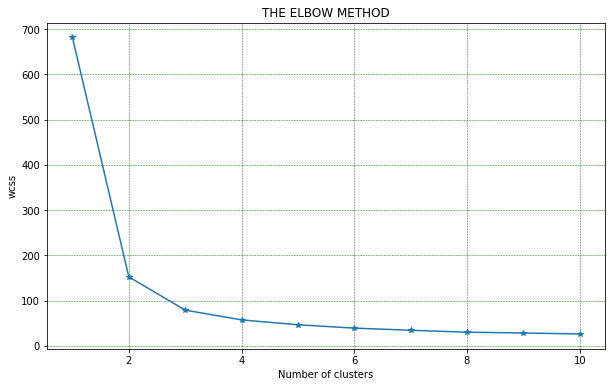

In [7]:
plt.figure(figsize = (10,6))
plt.plot(range(1,11),wcss , marker ='*')
plt.title('THE ELBOW METHOD')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.grid(color = 'green', linestyle = '--', linewidth = '0.5')
plt.show()

We have our plot, so let’s analyze it.
<br>
We see the function is monotonically decreasing. Sometimes it can be rapidly declining, other times – more smoothly. Depending on the shape of this graph, we make a decision about the number of clusters. The approach is known as **'The Elbow Method'**.As we can see that this graph looks like an arm with an elbow. The goal here is to spot the elbow itself and take that many clusters. Usually, the part of the graph before the elbow would be steeply declining, while the part after it – much smoother.
<br>

It seems we’ve got a clear winner: **the Elbow on the graph is at the 3-cluster mark**. This is the only place until which the graph is steeply declining, while smoothening out afterwards.

- **Creating the k-means classifier**

In [8]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state= 0)
y_kmeans = kmeans.fit_predict(x)

- **Visualize the Clusters:** 

**on the first two columns (i.e. sepal length, sepal width) and plot the centroids of the clusters**

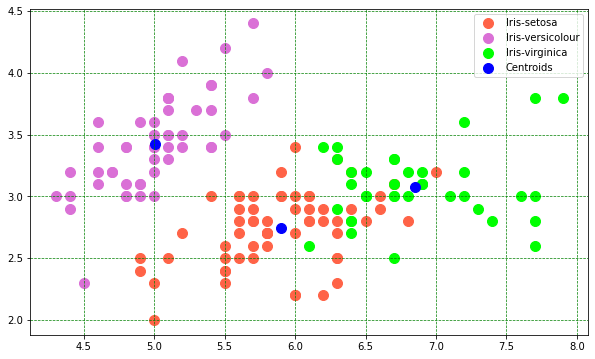

In [9]:
plt.figure(figsize = (10,6))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'tomato', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'orchid', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], 
            s = 100, c = 'lime', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s= 100, c = 'blue', label = 'Centroids')
plt.grid(color = 'green', linestyle = '--', linewidth = '0.7')
plt.legend()

**on the next two columns (i.e. petal length, petal width) and plot the centroids of the clusters**

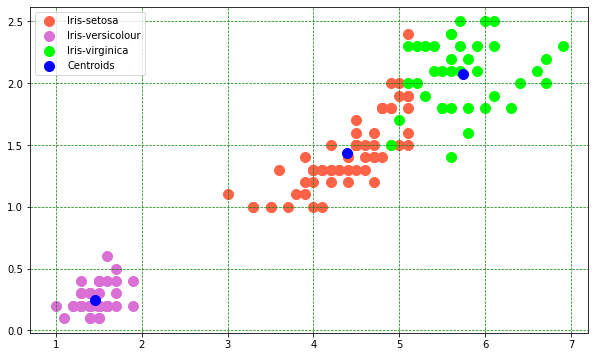

In [10]:
plt.figure(figsize = (10,6))
plt.scatter(x[y_kmeans == 0, 2], x[y_kmeans == 0, 3], 
            s = 100, c = 'tomato', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 2], x[y_kmeans == 1, 3], 
            s = 100, c = 'orchid', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 2], x[y_kmeans == 2, 3], 
            s = 100, c = 'lime', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], s= 100, c = 'blue', label = 'Centroids')
plt.grid(color = 'green', linestyle = '--', linewidth = '0.7')
plt.legend()

#### APPLYING SOME DIFFERENT METHODS FOR DATA VISUALIZATION

In [11]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

- **Heat Map**

<AxesSubplot:>

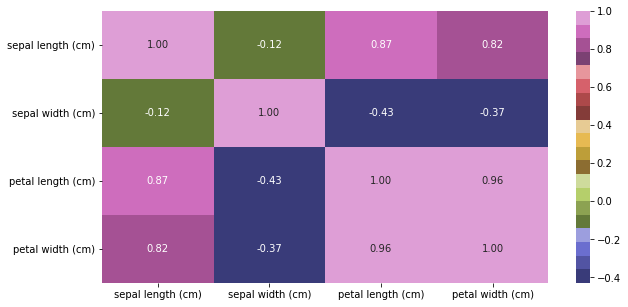

In [12]:
corr = iris_df.corr()
fig,ax= plt.subplots(figsize=(10,5))
sns.heatmap(corr,cmap = 'tab20b',annot= True, fmt = '.2f')

In [13]:
corr = iris_df.corr()
corr.style.background_gradient(cmap= 'tab20b').set_precision(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.00,-0.12,0.87,0.82
sepal width (cm),-0.12,1.00,-0.43,-0.37
petal length (cm),0.87,-0.43,1.00,0.96
petal width (cm),0.82,-0.37,0.96,1.00


- **Scatter plot**

<AxesSubplot:xlabel='Sepal Length', ylabel='Sepal width'>

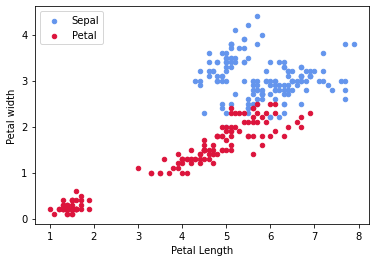

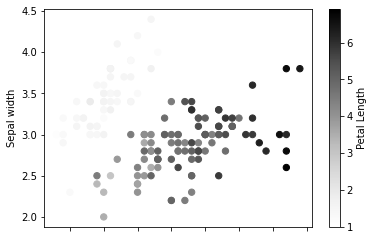

In [14]:
iris_df = pd.DataFrame(iris.data, columns=['Sepal Length', 'Sepal width', 'Petal Length', 'Petal width'])
ax = iris_df.plot.scatter(x='Sepal Length', y='Sepal width', label = 'Sepal', color= 'cornflowerblue')
iris_df.plot.scatter(x='Petal Length', y='Petal width', label = 'Petal', color= 'crimson', ax=ax)
iris_df.plot.scatter(x='Sepal Length', y='Sepal width',c = 'Petal Length',s = 40)

-  **Histograph**

array([[<AxesSubplot:title={'center':'Sepal Length'}>,
        <AxesSubplot:title={'center':'Sepal width'}>],
       [<AxesSubplot:title={'center':'Petal Length'}>,
        <AxesSubplot:title={'center':'Petal width'}>]], dtype=object)

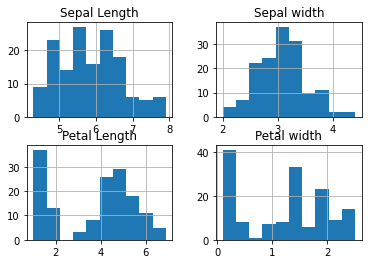

In [15]:
iris_df.hist()

- **Box Plot**

<AxesSubplot:>

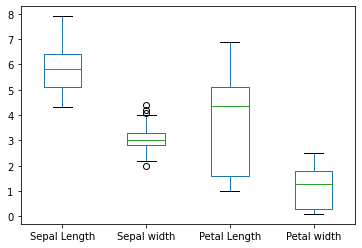

In [16]:
iris_df.plot.box()

### Conclusion: 

**From the given dataset, the optimum number of clusters of Iris is found to be : 3  .**